
---This notebook have been runed with--- 

Openfisca-france : f25df0a8d89557bae04c2170eb526a722ba14d34 

Commit short SHA: f25d

Branch:  next

Date (y/m/d): 2015-09-03 19:24:03  

Openfisca-core : f25df0a8d89557bae04c2170eb526a722ba14d34  Date: 2015-09-03 19:24:03 

In [11]:
import git  #Requires Gitpython installed, to install do "$ pip install Gitpython" in your terminal
import pkg_resources
openfisca_france_location = pkg_resources.get_distribution('openfisca-france').location
repo = git.Repo(openfisca_france_location)
repo.git.status()

sha = repo.head.object.hexsha

print "---This notebook have been runed with--- \n","Openfisca-france :", repo.head.object.hexsha, '\n' 
print "Commit short SHA:", repo.git.rev_parse(sha, short=4)
print "Branch: ", repo.git.rev_parse('--abbrev-ref', "HEAD") #equivalent to: $git rev-parse --abbrev-ref HEAD
print "Date (y/m/d):", repo.git.show("-s", '--format=%ci', 'HEAD^')[:-5],"\n"  # equivalent to: $git show -s --format=%ci HEAD^

print "Openfisca-core :", git.Repo(pkg_resources.get_distribution('openfisca-france').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-france').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]


---This notebook have been runed with--- 
Openfisca-france : f25df0a8d89557bae04c2170eb526a722ba14d34 

Commit short SHA: f25d
Branch:  next
Date (y/m/d): 2015-09-03 19:24:03  

Openfisca-core : f25df0a8d89557bae04c2170eb526a722ba14d34  Date: 2015-09-03 19:24:03 


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision = 2,threshold= 3000, suppress=True)

In [17]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
from openfisca_core import periods
import openfisca_france    # module décrivant le système socio-fiscal français
from openfisca_france.tests import base
TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
print TaxBenefitSystem
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français

<class 'openfisca_france.TaxBenefitSystem'>


In [28]:
salaire_imposable_maximal = 2*10**5
count = 3000
axes_variable = 'salaire_de_base'

In [29]:
def make_couple_avec_enfants_scenario(nombre_enfants = 2, year = 2014):
    enfant = [dict(
        birth = date(2005, 1, 1),
        )]
    enfants = enfant * nombre_enfants
    scenario = tax_benefit_system.new_scenario().init_single_entity(
        axes = [[
            dict(
                count = count,
                min = 0,
                max = salaire_imposable_maximal,
                name = axes_variable,
                period = year-2,
                ),
            dict(
                count = count,
                min = 0,
                max = salaire_imposable_maximal,
                name = axes_variable,
                period = year-1,
                ),
            dict(
                count = count,
                min = 0,
                max = salaire_imposable_maximal,
                name = axes_variable,
                period = year,
                ),
            ]],
        period = year,
        parent1 = dict(
            birth = date(1980, 1, 1),
            statmarit = 5, #pacsés
            ),
        parent2 = dict(
            birth = date(1980, 1, 1),
            statmarit = 5,
            ),
        enfants = enfants,
        menage = dict(
            loyer = 1000,
            statut_occupation = 4,
            ),
        )
    return scenario


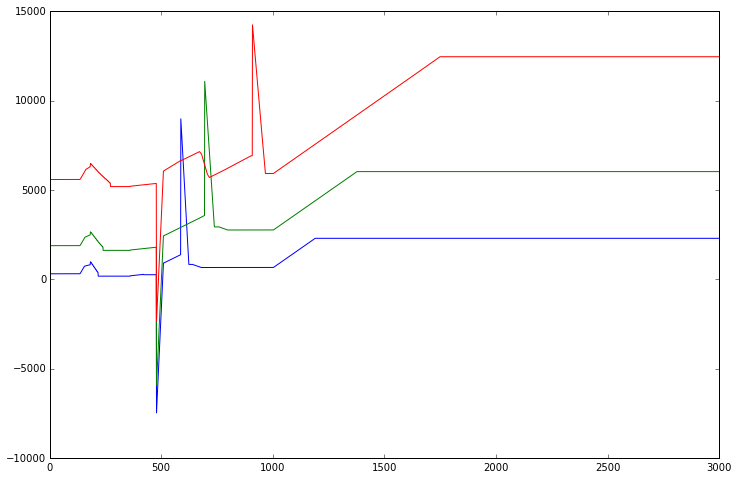

In [35]:
aucun_enfant_scenario = make_couple_avec_enfants_scenario(nombre_enfants = 0, year = 2008)
aucun_enfant_simulation = aucun_enfant_scenario.new_simulation(debug = False, debug_all = False, trace = False)
aucun_enfant_simulation.calculate_add('revdisp','2008')
plt.figure(figsize= (12,8))
for nb_enf in range(1,4): 
    plt.plot(make_couple_avec_enfants_scenario(
            nombre_enfants = nb_enf, year = 2008).new_simulation(
            ).calculate_add('revdisp','2008') -
            aucun_enfant_simulation.calculate_add('revdisp','2008'))